In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
heartattack=pd.read_csv('/content/heartattack.csv')

In [8]:
heartattack.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


Dataset di atas merupakan dataset klasifikasi yang berisi prediksi penyakit serangan jantung. Setiap baris mewakili satu pasien. Kolom pada dataset di atas merupakan fitur-fitur yang diamati pada orang tersebut. Terdapat 8 fitur yang diamati dalam dataset tersebut, diantaranya:
1. Age : usia pasien dalam tahun.
2. gender : jenis kelamin.
3. impluse : denyut jantung.
4. pressurehight : tekanan darah sistolik.
5. pressurelow : tekanan darah diastolik.
6. glucose : kadar gula darah.
7. kcm : Kreatinin Clearance Measurement.
8. troponin : kadar troponin.

Pada dataset tersebut, terdapat 1 kolom target yaitu: class. Dalam hal ini, class menunjukkan apakah pasien mengidap penyakit serangan jantung atau tidak.


In [9]:
heartattack.tail(10)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
1309,47,1,94,105,81,135.0,36.24,0.263,positive
1310,70,0,80,135,75,351.0,2.21,10.000,positive
1311,85,1,112,115,69,114.0,2.19,0.062,positive
1312,48,1,84,118,68,96.0,5.33,0.006,negative
1313,86,0,40,179,68,147.0,5.22,0.011,negative
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive
1318,51,1,94,157,79,134.0,50.89,1.770,positive


Pada kolom class, label bernilai 0 atau 1. Label bernilai 1 menunjukkan bahwa pasien mengalami serangan jantung. Sedangkan label bernilai 0 menunjukkan bahwa pasien tidak mengalami serangan jantung.

In [10]:
#melihat statistik deskriptif
heartattack.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


# Preprocessing Data

**Cek Missing Values**

In [11]:
heartattack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 8 kolom, dengan jumlah baris untuk setiap kolom sebanyak: 1319 baris. Karena semua kolom memiliki jumlah baris yang sama, yaitu  1319 baris, maka pada data tersebut tidak terdapat missing values.  

In [12]:
heartattack.isnull().sum()

,0
age,0
gender,0
impluse,0
pressurehight,0
pressurelow,0
glucose,0
kcm,0
troponin,0
class,0


In [13]:
#mengetahui jumlah missing value di seluruh dataset
heartattack.isnull().sum().sum()

np.int64(0)

**Cek Outlier**

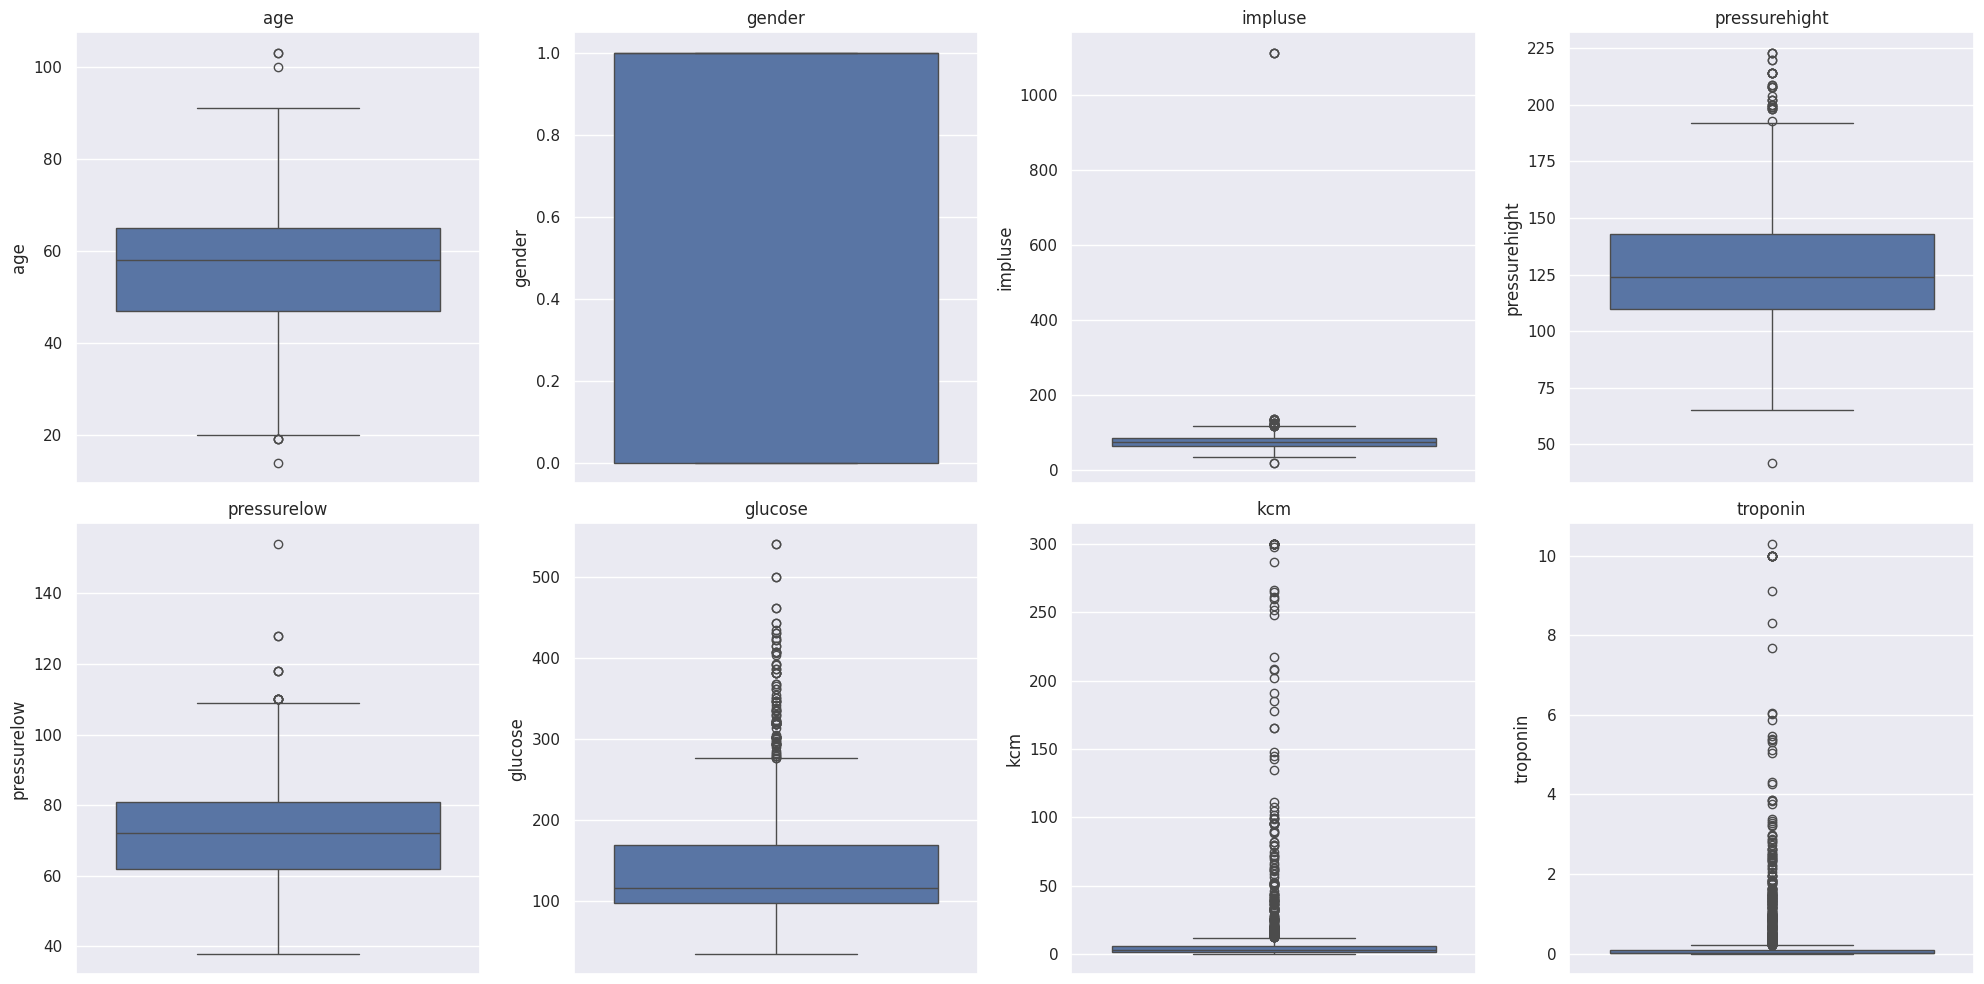

In [14]:
# Kolom numerik yang ingin dicek outliernya
num_cols = ['age','gender','impluse','pressurehight','pressurelow','glucose','kcm','troponin']

# Visualisasi Boxplot
plt.figure(figsize=(20, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=heartattack[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Dapat dilihat bahwa hampir semua fitur mengandung outlier. Hanya kolom gender yang tidak mengandung outlier.

In [15]:
# Fungsi deteksi outlier dengan metode IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    if col in heartattack.columns:
        outliers = detect_outliers_iqr(heartattack, col)
        print(f"{col}: {len(outliers)} outliers")

age: 7 outliers
gender: 0 outliers
impluse: 30 outliers
pressurehight: 32 outliers
pressurelow: 12 outliers
glucose: 92 outliers
kcm: 205 outliers
troponin: 257 outliers


Banyaknya outlier dari setiap kolom dapat dilihat dari hasil output di atas.

**Penanganan Outlier**

Penanganan outlier dilakukan dengan menggunakan metode Winsorizing.

In [16]:
# Metode Winsorizing (Mengganti Outlier dengan Batas IQR)
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Menerapkan winsorizing pada semua kolom numerik
for col in num_cols:
    if col in heartattack.columns:
        winsorize_iqr(heartattack, col)

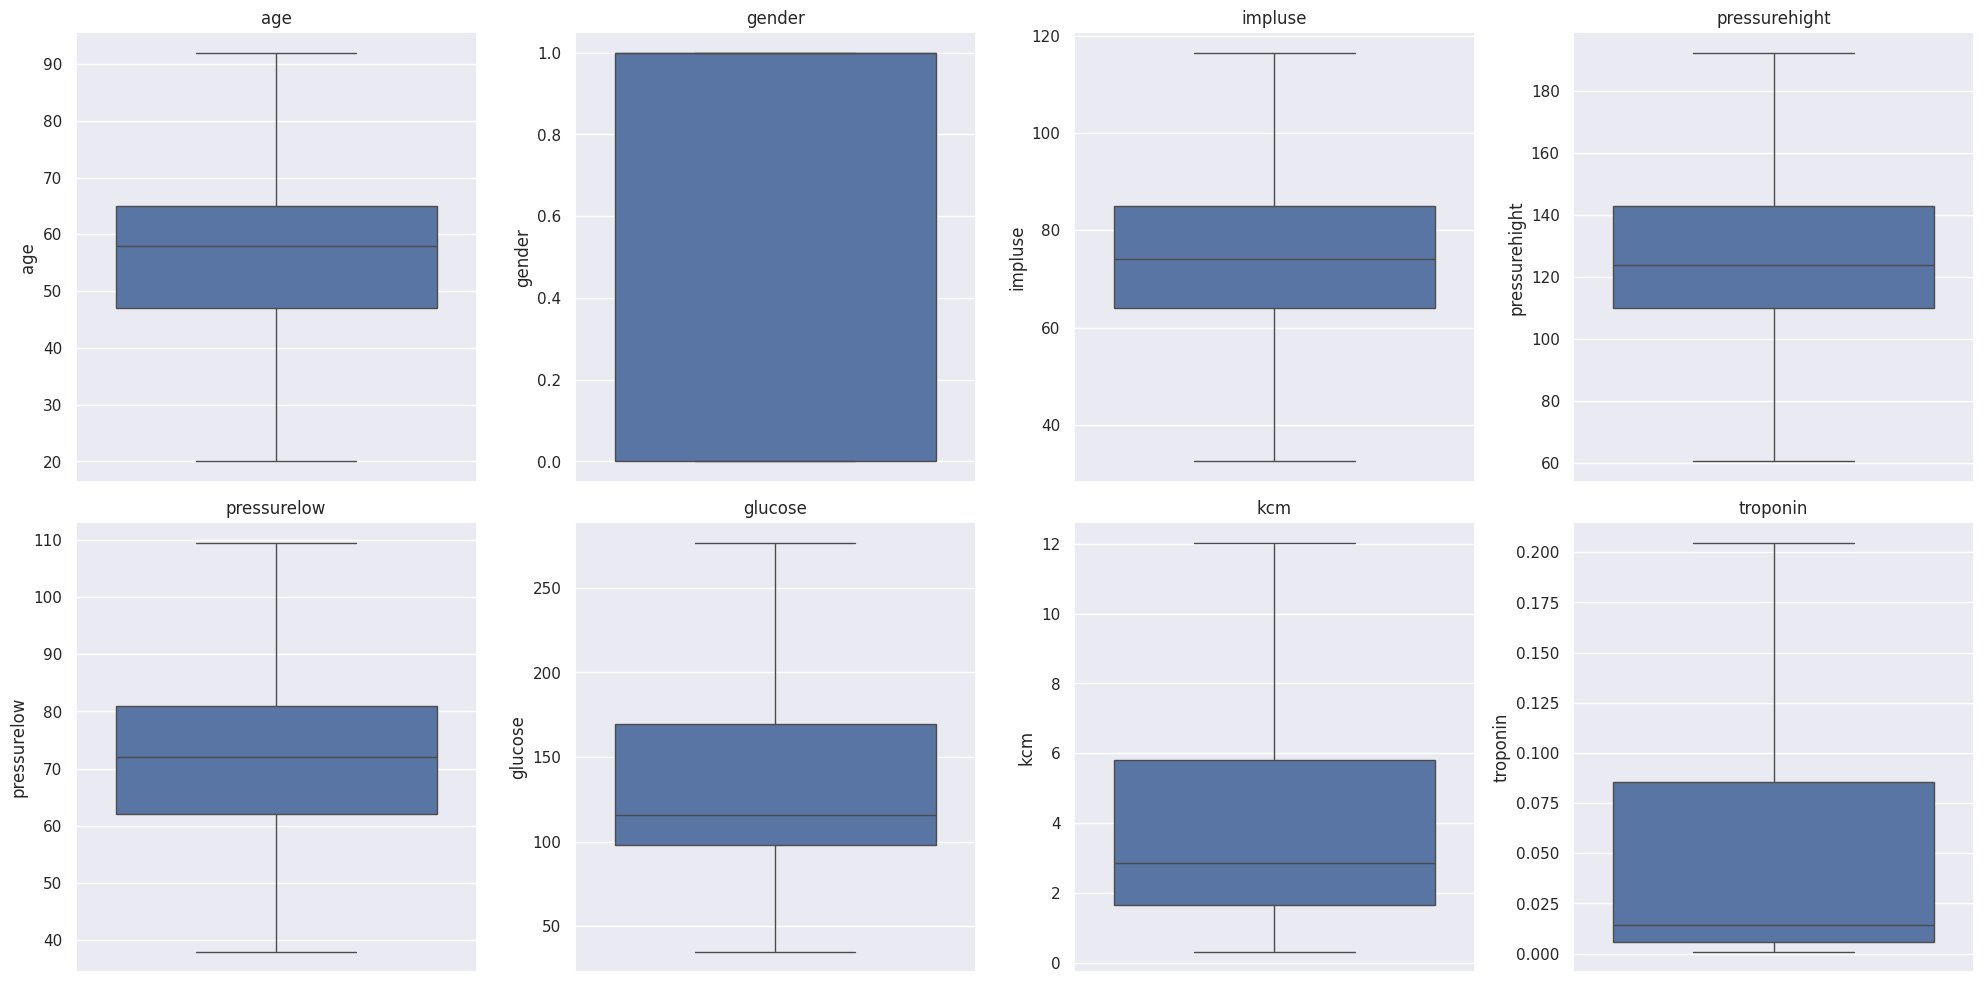

In [17]:
#cek boxplot kembali
plt.figure(figsize=(20, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)  # 2 baris, 4 kolom
    sns.boxplot(y=heartattack[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Pada hasil output di atas, tampak bahwa sudah tidak terdapat outlier setelah ditangani dengan menggunakan metode Winsorizing.

**Encoding Data Categorik**

Kolom yang memerlukan encoding adalah kolom class.

In [18]:
#melihat isi dalam kolom
heartattack['class'].unique()

array(['negative', 'positive'], dtype=object)

Diketahui bahwa isi dari kolom class berupa data kategori (negative/positive). Oleh karena itu, pada kolom ini perlu dilakukan encoding untuk mengubah data kategorik ke data numerik untuk mempermudah proses pengolahan data selanjutnya. Metode yang digunakan adalah One-Hot Encoding.

In [19]:
# Data kategorik
data = pd.DataFrame({'kategori': ['negative','positive']})

# One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['kategori'], prefix='kategori').astype(int)

# Menampilkan hasil
print(data_encoded)

   kategori_negative  kategori_positive
0                  1                  0
1                  0                  1


In [20]:
print(data['kategori'].head())

0    negative
1    positive
Name: kategori, dtype: object


In [21]:
data['kategori'].unique()

array(['negative', 'positive'], dtype=object)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   kategori  2 non-null      object
dtypes: object(1)
memory usage: 148.0+ bytes


# Analisis Klasifikasi

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
heartattack['class'] = le.fit_transform(heartattack['class'])
print(heartattack['class'].unique())
heartattack.head()

[0 1]


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64.0,1.0,66.0,160.0,83.0,160.00,1.80,0.01200,0
1,21.0,1.0,94.0,98.0,46.0,276.75,6.75,0.20475,1
2,55.0,1.0,64.0,160.0,77.0,270.00,1.99,0.00300,0
3,64.0,1.0,70.0,120.0,55.0,270.00,12.03,0.12200,1
4,55.0,1.0,64.0,112.0,65.0,276.75,1.08,0.00300,0


In [24]:
count_values = heartattack['class'].value_counts()
count_values

,count
class,
1,810
0,509


In [25]:
# Menghitung rata-rata berdasarkan nilai 'class'
mean_by_class = heartattack.groupby('class').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'class'
print(mean_by_class)

             age    gender    impluse  pressurehight  pressurelow     glucose  \
class                                                                           
0      52.108055  0.603143  75.887033     127.584479    72.385069  143.283792   
1      58.732099  0.695062  75.959877     126.353704    72.060494  139.971914   

            kcm  troponin  
class                      
0      2.555344  0.007309  
1      5.662505  0.090746  


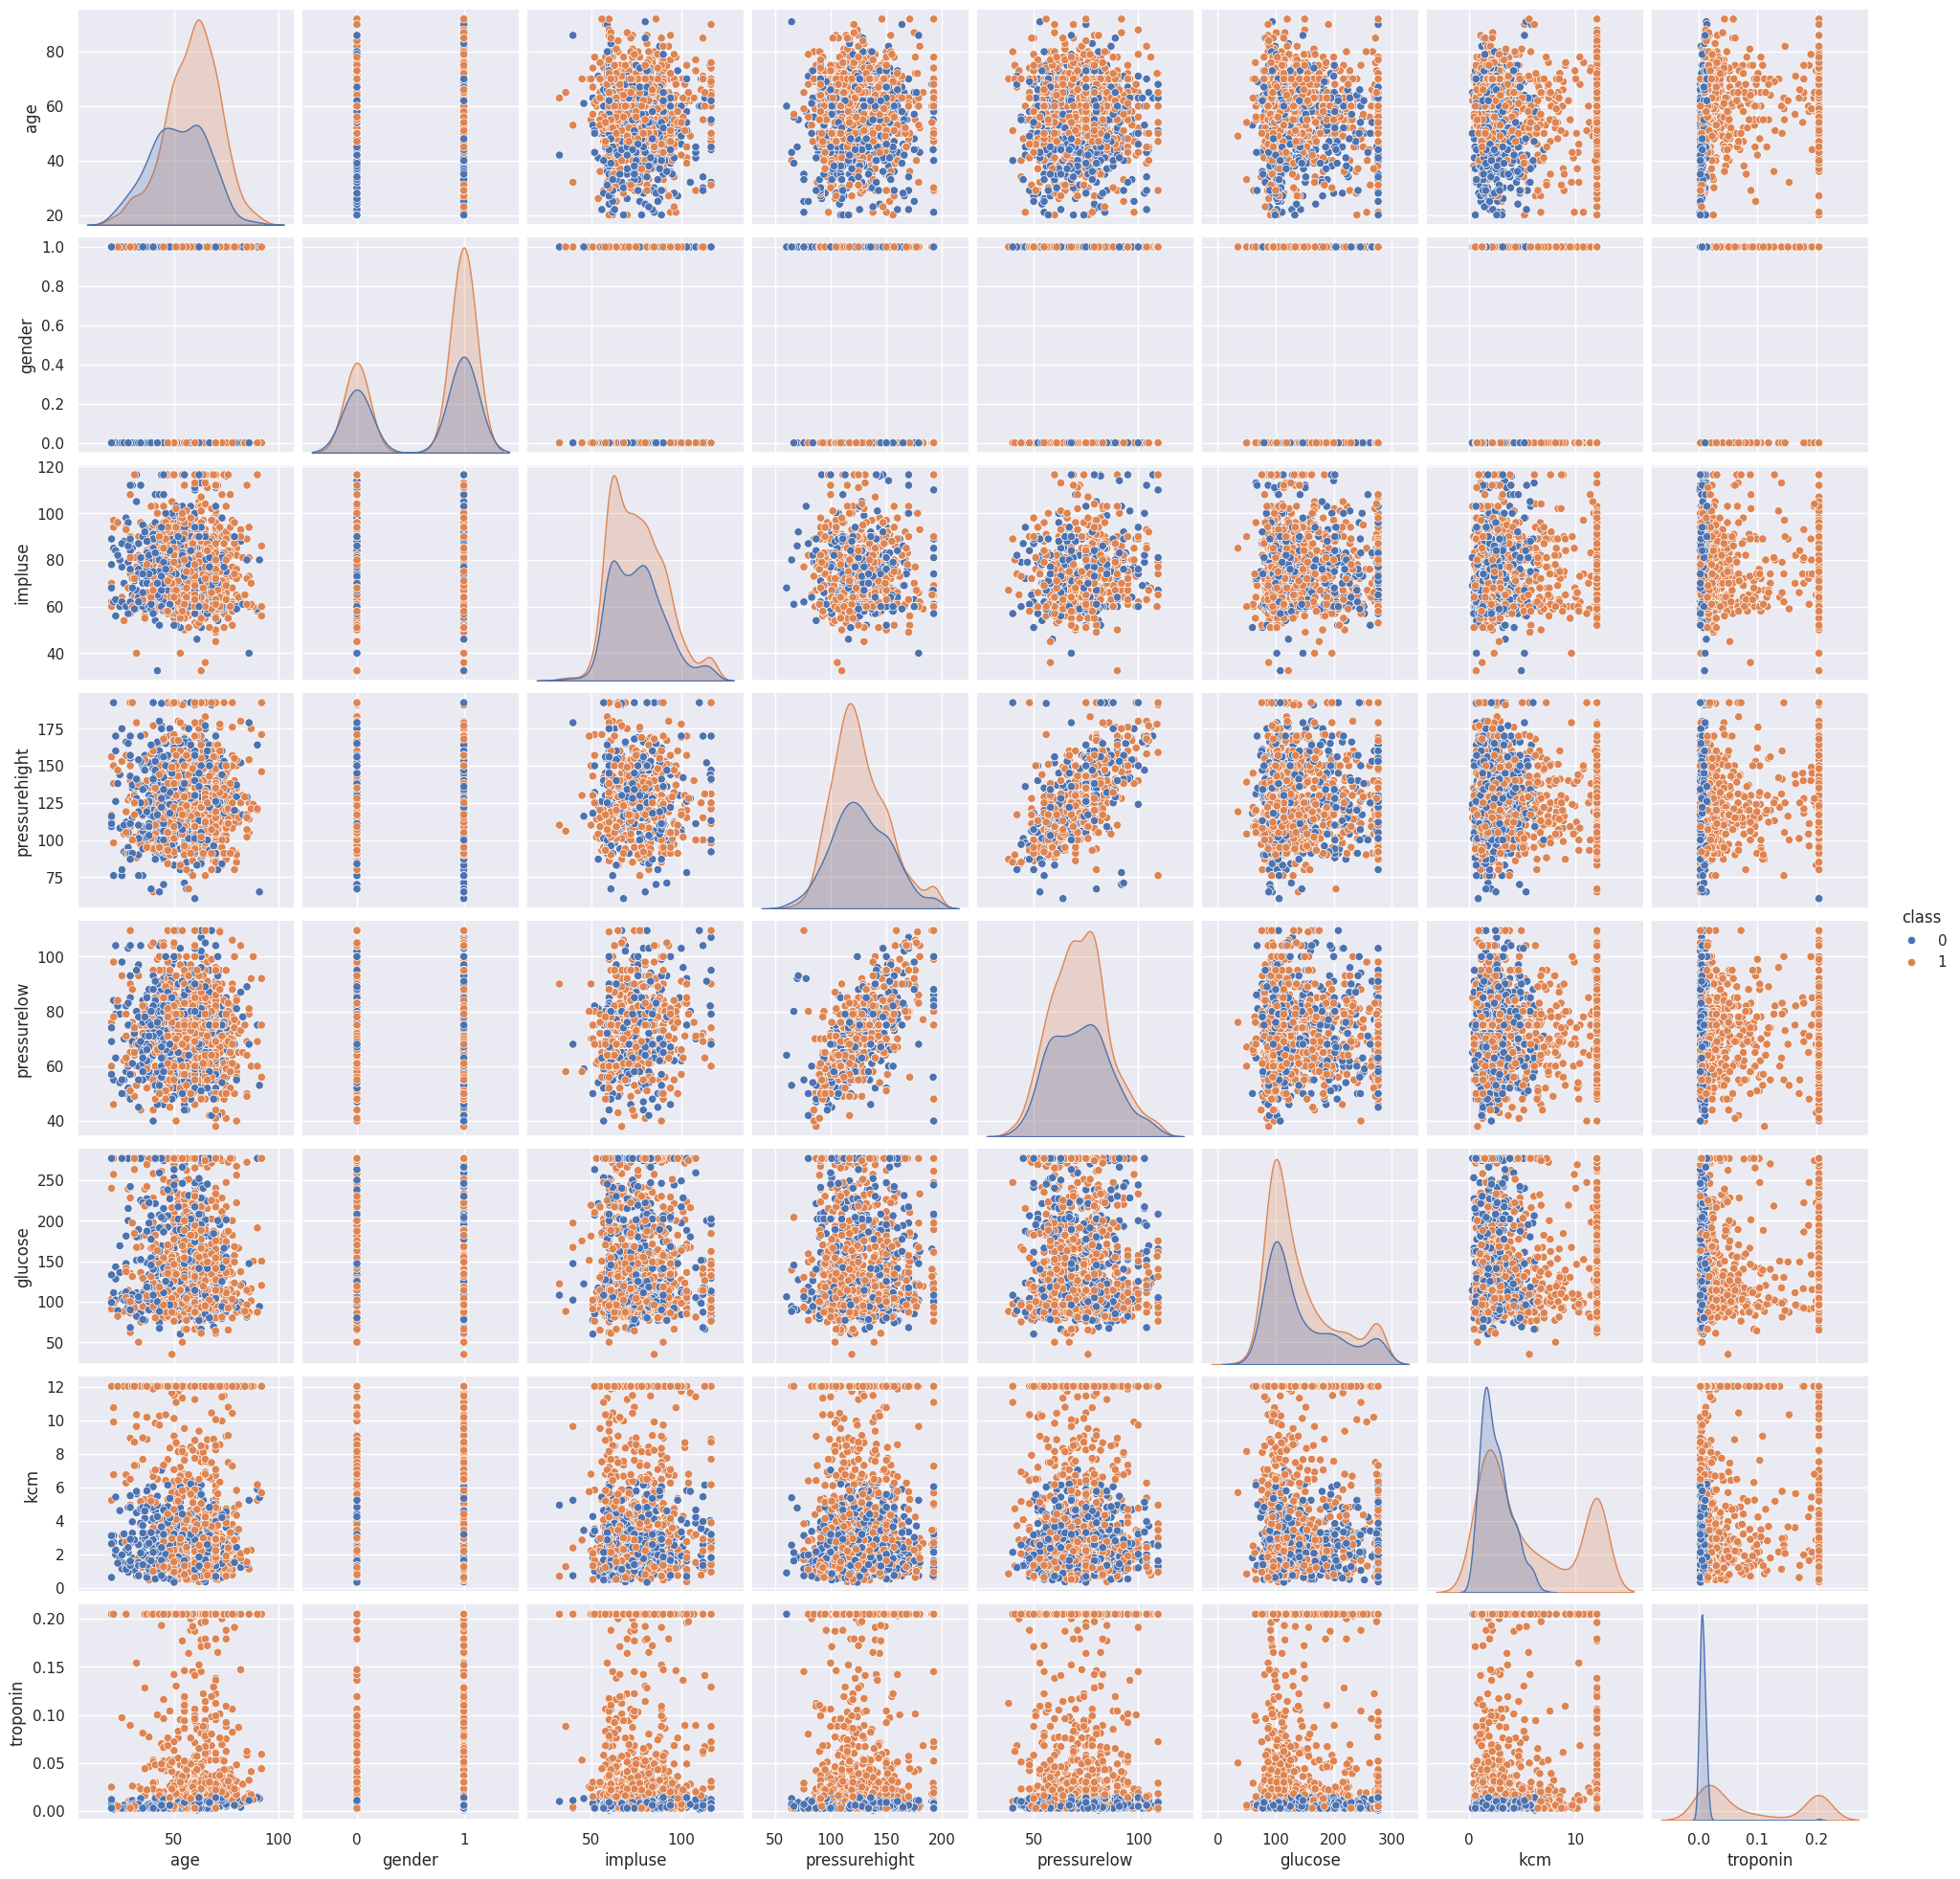

In [26]:
#visualisasi. warna dibedakan berdasarkan classnya apakah heartattack (serangan jantung) atau tidak
sns.pairplot(heartattack, vars=['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin'], hue='class')

Pada visualisasi data di atas, warna dibagi berdasarkan 'class'. Setiap scatter plot dalam grid akan menunjukkan hubungan antara dua variabel, di mana titik-titik diberi warna yang berbeda tergantung pada apakah pasien mengalami serangan jantung atau tidak.  

In [27]:
import seaborn as sns
import pandas as pd

# Menghitung korelasi antara setiap variabel dengan 'class'
correlation_with_class = heartattack.corr()['class'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'class'
print(correlation_with_class)

class            1.000000
troponin         0.517664
kcm              0.395525
age              0.237902
gender           0.094432
impluse          0.002396
pressurelow     -0.011512
pressurehight   -0.023946
glucose         -0.027213
Name: class, dtype: float64


<Axes: >

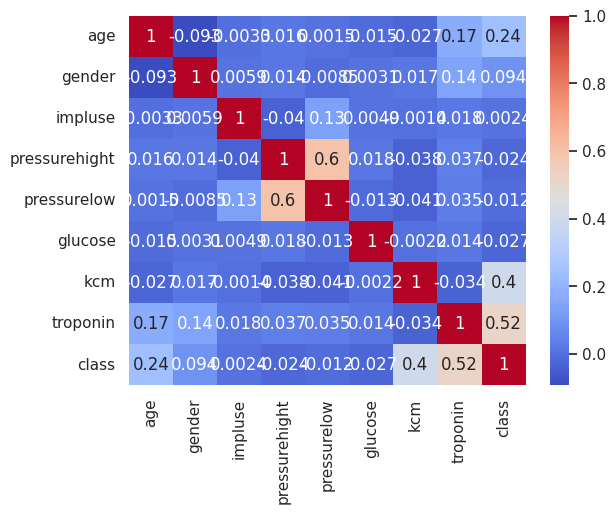

In [28]:
sns.heatmap(heartattack.corr(), annot=True, cmap='coolwarm')

Hasil Output di atas menunjukkan nilai korelasi antara variabel 'class' yang merupakan kolom target dengan setiap variabel lain dalam dataset heartattack. Nilai korelasi mendekati 1 menunjukkan korelasi positif yang kuat, seperti troponin yang memiliki nilai korelasi sebesar 0.517664 dengan 'class'. Sedangkan glucose dengan nilai korelasi -0.027213 dengan 'class' menunjukkan korelasi negatif yang kuat karena mendekati -1.

**Memisahkan Variabel X dan Y**

In [29]:
#memisahkan data menjadi variabel x dan y
X = heartattack.drop(['class'], axis=1)
y = heartattack['class']

Data X merupakan data yang berisi variabel independen. Dalam hal ini data independen berupa fitur-fitur yang digunakan oleh model untuk melakukan klasifikasi. Fitur-fitur tersebut antara lain troponin, kcm, age, gender, impluse, pressurelow, pressurehight, dan glucose. Sedangkan, data Y merupakan data yang berisi variabel dependen yang ingin diprediksi. Dalam dataset ini, yaitu class.

**Membagi Data Menjadi Data Training dan Testing**

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.81944444 1.         0.49404762 ... 0.52039691 0.21513366 0.10797546]
 [0.25       0.         0.56547619 ... 0.3660419  0.07421641 0.00981595]
 [0.69444444 1.         0.73214286 ... 0.78941566 0.26125203 1.        ]
 ...
 [0.34722222 1.         0.83928571 ... 0.27783903 0.20659322 0.3190184 ]
 [0.55555556 1.         0.625      ... 0.24255788 0.17499359 0.09325153]
 [0.76388889 0.         0.36309524 ... 0.21609702 0.05969767 0.36319018]]


# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [33]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [34]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.8568720379146919

Akurasi pada data pelatihan:
*   akurasi training: sekitar 85.7%

Artinya, dari seluruh data pelatihan, sekitar 85.7% diprediksi benar oleh model GNB.

In [35]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [36]:
# import accuracy_score function
from sklearn.metrics import accuracy_score

for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.8712


Akurasi pada data pengujian:
*   akurasi testing: sekitar 87.12%

Artinya, dari seluruh data yang diuji (data baru yang belum pernah dilihat model), sekitar 87.12% prediksi yang dibuat oleh model adalah benar.

**Evaluasi Model Menggunakan Confusion Matrix dan Akurasi**

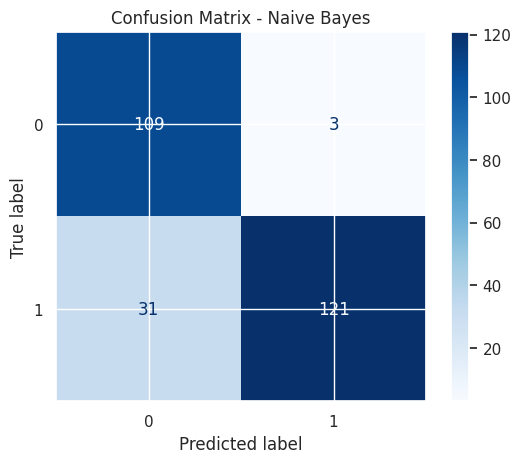

Naive Bayes Accuracy: 0.8712


In [37]:
# Mengevaluasi model menggunakan confusion matrix dan akurasi
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Prediksi data uji
y_pred = nb.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Akurasi
acc = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy: {:.4f}".format(acc))

Berdasarkan hasil output di atas, diperoleh hasil interpretasi sebagai berikut:
1. True Positives (TP) = 121
→ Prediksi positif (serangan jantung) dan benar.

2. True Negatives (TN) = 109
→ Prediksi negatif (tidak ada serangan jantung) dan benar.

3. False Positives (FP) = 3
→ Salah prediksi ada serangan jantung, padahal tidak ada.

4. False Negatives (FN) = 31
→ Salah prediksi tidak ada serangan jantung, padahal ada.





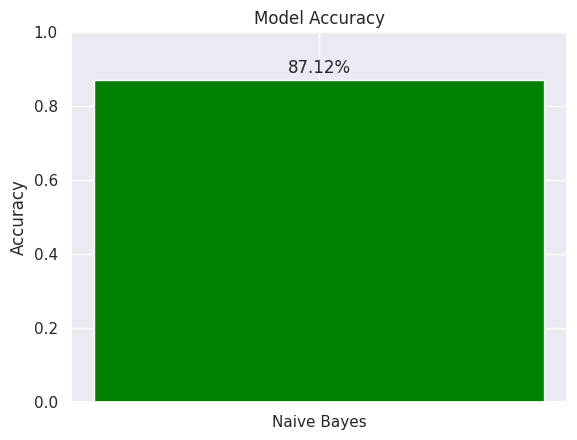

In [38]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)

# Visualisasi akurasi
plt.bar(['Naive Bayes'], [accuracy], color='green')
plt.ylim(0, 1)  # agar sumbu y dari 0 sampai 1
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.text(0, accuracy + 0.02, f'{accuracy:.2%}', ha='center')  # Tampilkan nilai akurasi dalam persen
plt.show()

Grafik di atas menunjukkan akurasi model sebesar 87.12%, artinya dari semua data testing yang diberikan 87.12% prediksi model benar.

# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred = knn.predict(X_test)
KNN_acc = accuracy_score(y_test, y_pred)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print('Akurasi KNN:', (KNN_acc))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       112
           1       0.87      0.84      0.85       152

    accuracy                           0.83       264
   macro avg       0.83      0.83      0.83       264
weighted avg       0.84      0.83      0.83       264

Akurasi KNN: 0.8333333333333334


Diperoleh akurasi model KNN sebesar 83.33%.

Artinya, sekitar 83.33% prediksi model KNN benar ketika diuji pada data yang belum pernah dilihat sebelumnya. Berdasarkan output di atas, dapat dilihat juga bahwa:
1. Precision: ketepatan prediksi positif.

  *  class 0 (negative): 79% dari prediksi class 0 benar.
  *  class 1 (positive) : 87% dari prediksi class 1 benar.

2. Recall: Kemampuan model menemukan semua data positif.

  *  class 0 (negative) : Model berhasil menemukan 83% dari semua data class 0.
  *  class 1 (positive) : Model berhasil menemukan 84% dari semua data class 1.

3. F1-Score: Rata-rata harmonis precision dan recall (semakin mendekati 1, semakin baik.

  *   class 1 (positive) memiliki performa terbaik yaitu 85%








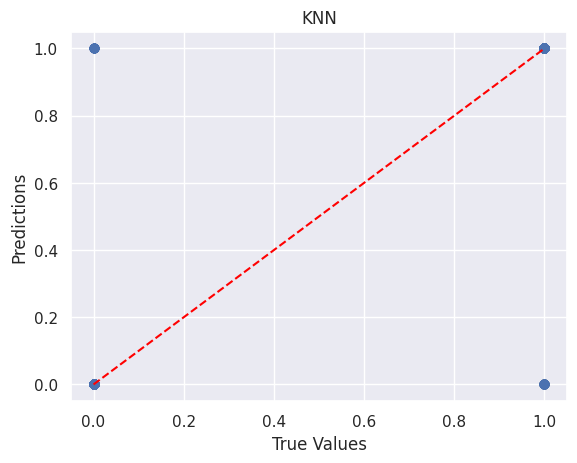

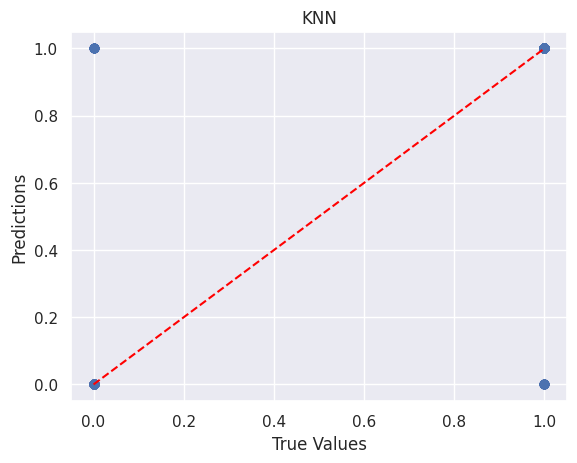

In [51]:
#plot data train
plt.scatter(y_train, knn.predict(X_train))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('KNN')
plt.show()

#plot data test
plt.scatter(y_test, knn.predict(X_test))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('KNN')
plt.show()

Garis diagonal yang ditampilkan pada grafik di atas menggambarkan situasi ideal dimana nilai aktual dan nilai prediksi sama. Jika model yang dibuat berhasil memprediksi dengan baik, maka titik akan membentuk pola yang hampir lurus mengikuti garis diagonal.

**Testing**

In [45]:
testing = {
    'age': [54],
    'gender': [1],
    'impluse': [69],
    'pressurehight': [160],
    'pressurelow': [55],
    'glucose': [273.0],
    'kcm': [9.56],
    'troponin': [0.022]
}

testing = pd.DataFrame(testing)
testing


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,54,1,69,160,55,273.0,9.56,0.022


Misalkan dipunyai data pasien baru dengan kriteria sebagai berikut;
age : 54 tahun,
gender : laki-laki,
impluse : 69,
pressurehight : 160,
pressurelow : 55,
glucose : 273,
kcm : 9.56,
troponin : 0.022. Akan dicari tahu apakah pasien tersebut mengalami serangan jantung atau tidak.

In [46]:
pred_coba = knn.predict(testing)
print('Hasil prediksi serangan jantung :')
print(pred_coba)

Hasil prediksi serangan jantung :
[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Berdasarkan hasil klasifikasi yang telah dilakukan model, dapat disimpulkan bahwan pasien dengan kriteria di atas termasuk pasien yang mengalami serangan jantung.

Kita telah melakukan klasifikasi dengan model Naive Bayes dan KNN. Hasil output akurasi model yang telah kita peroleh sebelumnya, yaitu:

*   akurasi model Naive Bayes sebesar 87.12%
*   akurasi model KNN sebesar 83.33%.

Model Naive Bayes memiliki akurasi lebih tinggi dibanding KNN, yaitu selisih sekitar 3.79%. Hal ini menunjukkan bahwa Naive Bayes lebih baik dalam menggeneralisasi data pada kasus heartattack ini. Kemungkinan karena distribusi fitur pada data sesuai dengan asumsi probabilistik Naive Bayes, atau karena Naive Bayes lebih stabil terhadap noise dan tidak terlalu terpengaruh oleh outlier seperti KNN.